In [79]:
import numpy as np
import pandas as pd
import ipdb
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:

# Load the training dataset
train_df = pd.read_csv(r'C:\Users\o.gezerli\OneDrive - FlixBus GmbH (B2E B2B) - Prod\Desktop\code_projects\nyc_taxi_trip_duration_python\nyc_taxi_trip_duration\data\train.csv',on_bad_lines='skip')
# Print the first 5 rows of the dataset
train_df.head()


C:\Users\o.gezerli\AppData\Local\Temp\ipykernel_15760\2661988154.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r'C:\Users\o.gezerli\OneDrive - FlixBus GmbH (B2E B2B) - Prod\Desktop\code_projects\nyc_taxi_trip_duration_python\nyc_taxi_trip_duration\data\train.csv',on_bad_lines='skip')


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.78252,N,435.0


In [81]:
test_df = pd.read_csv(r'C:\Users\o.gezerli\OneDrive - FlixBus GmbH (B2E B2B) - Prod\Desktop\code_projects\nyc_taxi_trip_duration_python\nyc_taxi_trip_duration\data\test.csv')


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930061 entries, 0 to 930060
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  930061 non-null  object 
 1   vendor_id           930061 non-null  int64  
 2   pickup_datetime     930061 non-null  object 
 3   dropoff_datetime    930061 non-null  object 
 4   passenger_count     930061 non-null  int64  
 5   pickup_longitude    930061 non-null  float64
 6   pickup_latitude     930061 non-null  float64
 7   dropoff_longitude   930061 non-null  float64
 8   dropoff_latitude    930061 non-null  object 
 9   store_and_fwd_flag  930060 non-null  object 
 10  trip_duration       930060 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 78.1+ MB


In [83]:
train_df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,trip_duration
count,930061.000000,930061.000000,930061.000000,930061.000000,930061.000000,930060.000000
mean,1.508762,1.605882,-73.975191,40.743919,-73.976606,905.496964
std,0.499923,1.263716,0.046321,0.035696,0.027408,1640.152951
min,1.000000,0.000000,-77.896019,37.777771,-77.896019,1.000000
25%,1.000000,1.000000,-73.998734,40.724667,-73.991180,413.000000
50%,2.000000,1.000000,-73.986832,40.745327,-73.978989,802.000000
75%,2.000000,2.000000,-73.969620,40.769341,-73.965775,1156.000000
max,2.000000,6.000000,-72.809669,51.881084,-72.711395,86390.000000


In [84]:
train_df = train_df.dropna()

<Axes: ylabel='trip_duration'>

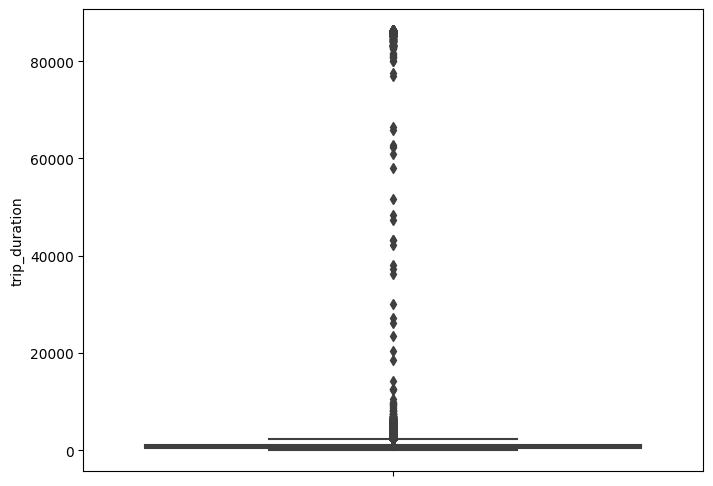

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(y=train_df['trip_duration'])

In [86]:
train_df.trip_duration.quantile(0.25)

413.0

In [87]:
train_df.trip_duration.quantile(0.75)

1156.0

In [88]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['hour'] = train_df['pickup_datetime'].dt.hour
train_df['dayofweek'] = train_df['pickup_datetime'].dt.dayofweek
train_df['month'] = train_df['pickup_datetime'].dt.month

In [89]:
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])
train_df['hour'] = train_df['dropoff_datetime'].dt.hour
train_df['dayofweek'] = train_df['dropoff_datetime'].dt.dayofweek
train_df['month'] = train_df['dropoff_datetime'].dt.month

In [90]:
train_df = train_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930060 entries, 0 to 930059
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  930060 non-null  object 
 1   vendor_id           930060 non-null  int64  
 2   passenger_count     930060 non-null  int64  
 3   pickup_longitude    930060 non-null  float64
 4   pickup_latitude     930060 non-null  float64
 5   dropoff_longitude   930060 non-null  float64
 6   dropoff_latitude    930060 non-null  object 
 7   store_and_fwd_flag  930060 non-null  object 
 8   trip_duration       930060 non-null  float64
 9   hour                930060 non-null  int32  
 10  dayofweek           930060 non-null  int32  
 11  month               930060 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 81.6+ MB


In [93]:
train_df['dropoff_latitude'] = train_df['dropoff_latitude'].astype('float64')
train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].astype('bool')

In [95]:
train_df['vendor_id'] = train_df['vendor_id'].astype('category')
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag'], prefix='flag', drop_first=True)

In [96]:
train_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,dayofweek,month
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,455.0,17,0,3
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,663.0,0,6,6
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,2124.0,12,1,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,429.0,19,2,4
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,435.0,13,5,3


In [98]:
train_df['hour'] = train_df['hour'].apply(lambda x: pd.Categorical(x, categories=range(24)))
train_df['dayofweek'] = train_df['dayofweek'].apply(lambda x:pd.Cagetorical(x, categories=range(7)))
train_df['month'] = train_df['month'].apply(lambda x:pd.Categorical(x, categories=range(1,13)))

TypeError: Categorical input must be list-like